In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.activations import linear, relu, sigmoid

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

Using Tensorflow neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks.


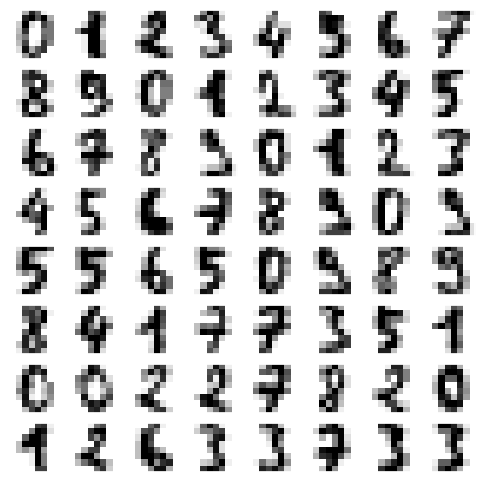

In [4]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [13]:
X = digits.data[:200, :]
Y = digits.target[:200]

X_test = digits.data[200:, :]
Y_true = digits.target[200:]

In [14]:
print(X.shape)
print(Y.shape)

print(X_test.shape)
print(Y_true.shape)

(200, 64)
(200,)
(1597, 64)
(1597,)


In [21]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [22]:
tf.random.set_seed(1234)
model = Sequential(
    [               
        Input(shape=(64,)),
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear')
    ], name = "handwritten_recognition" 
)

In [23]:
model.summary()

Model: "handwritten_recognition"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,175 (8.50 KB)

 Trainable params: 2,175 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
[relu1, relu2, linear] = model.layers

In [25]:
#### Examine Weights shapes
W1,b1 = relu1.get_weights()
W2,b2 = relu2.get_weights()
W3,b3 = linear.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (64, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [27]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,Y,
    epochs=60
)

Epoch 1/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1812
Epoch 2/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1519 
Epoch 3/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1291
Epoch 4/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1122 
Epoch 5/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0999 
Epoch 6/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0853 
Epoch 7/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0757 
Epoch 8/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0653 
Epoch 9/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0572 
Epoch 10/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0498 
Epoch 11/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0432 
Epoch 12/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0385 
Epoch 13/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0338 
Epoch 14/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0301 
Epoch 15/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0269 
Epoch 16/60
7/7 ━━━━━━━━━━━━━━━━━━━

In [32]:
prediction = model.predict(X_test)  # prediction
print(prediction.shape)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(1597, 10)


In [42]:
predicted_digits = np.argmax(prediction, axis=1)
predicted_digits

array([1, 5, 0, ..., 8, 9, 9], dtype=int64)

In [48]:
df = pd.DataFrame({'Y_true': Y_true, 'Predicted digits': predicted_digits})
df.head(15)

,Y_true,Predicted digits
0,1,1
1,5,5
2,0,0
3,9,5
4,5,5
5,2,0
6,8,8
7,2,2
8,0,0
9,0,0


Our model is not so good, it only captures about 74% of the  handwritten digits correctly. While this figure might look great, if this model is applied in banks to identify amount written in bank checks, it could potentially cause problem.

In [50]:
correct = Y_true[Y_true == predicted_digits] 
percentage_correct = (len(correct) / Y_true.shape[0]) * 100
percentage_correct

74.32686286787728

In [52]:
err = Y_true[Y_true != predicted_digits] 
percentage_err = (len(err) / Y_true.shape[0]) * 100
percentage_err

25.67313713212273